<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M7_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 1. SUPPORT VECTOR MACHINE**

**Entrega: MNIST y Fashion-MNIST**


# **Descripción de la tarea**

###Contexto

En esta práctica realizaremos clasificación de imágenes con Support Vector Machine. Para ello, utilizaremos dos datasets: MNIST y Fashion-MNIST.

MNIST 

- Es un dataset de dígitos de MNIST (Modified-NIST, del Instituto Nacional de Estándares y Tecnología de EEUU).

- Consta de 60.000 imágenes de entrenamiento y 10.000 de prueba. El tamaño de la imagen es de 28 x 28 píxeles. Cada imagen está etiquetada de 0 a 9 en función del dígito representado. 

- Se utiliza como banco de pruebas para clasificar imágenes con algoritmos de Machine Learning. 

Fashion-MNIST 

- Es un dataset de imágenes de artículos de moda de la empresa Zalando. Fue concebido para sustituir a MNIST porque requiere modelos de clasificación más complejos. 

- Mantiene las características de MNIST en cuanto a número de imágenes (60.000 de entrenamiento y 10.000 de prueba), tamaño de las imágenes (28 x 28 píxeles) y número de clases (10). 

- Se diferencia en el contenido de las imágenes: 10 tipos de artículos de moda, en lugar de los 10 dígitos. 

El objetivo es comparar el resultado (accuracy) en función del dataset y el tipo de kernel SVM.

Teniendo en cuenta la información anterior, te pedimos realizar las tareas siguientes: 

Dataset 

- Cargar ambos datasets desde tensorflow.
- Preprocesado: convertir las imágenes en vectores unidimensionales. 

Modelos de SVM: 
- Cargar el modelo de clasificador SVM de sklearn. 
- Utilizar dos tipos de kernel: Lineal y Gausiano.
- Entrenar con 20.000 imágenes.
- Probar con el dataset de prueba completo (10.000 imágenes).  

Consideraciones: 

Para acortar el tiempo de entrenamiento con el kernel gaussiano, se aconseja 

- Dejar el valor de gamma por defecto (“scale”).
- Dejar el valor de probability por defecto (“False”).

### **Importación librerias**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
from time import time
import datetime
import random
from sklearn.svm import SVC


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

# Lectura del dataset. 

Lectura del Dataset MNIST utilizando Keras:

In [3]:
mnist = keras.datasets.mnist
(train_digits, train_labeldigit), (test_digits, test_labeldigit) = mnist.load_data()

Tamaño del dataset MNIST:

In [4]:
(train_digits.shape, train_labeldigit.shape), (test_digits.shape, test_labeldigit.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Lectura del Dataset FASHION_MNIST utilizando Keras:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_fashion, train_labelfashion), (test_fashion, test_labelfashion) = fashion_mnist.load_data()

Tamaño dekl dataset FASHION-MNIST

In [6]:
(train_fashion.shape, train_labelfashion.shape), (test_fashion.shape, test_labelfashion.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Podemos ver que los datos en ambos Dataset son del tipo numpy.narray de tres dimensionesen el caso de los datos de train ya que son imagenes de 28x28 pixeles.

Veamos cuales son las imagenes asociadas a cada uno de nuestros dataset:

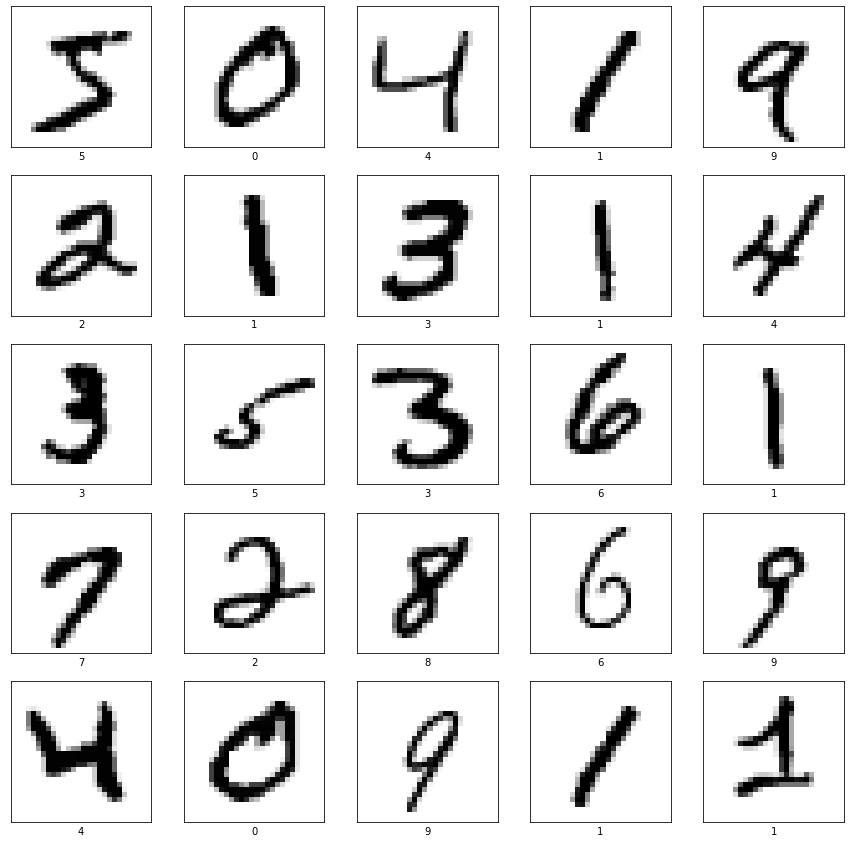

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labeldigit[i])
plt.show()

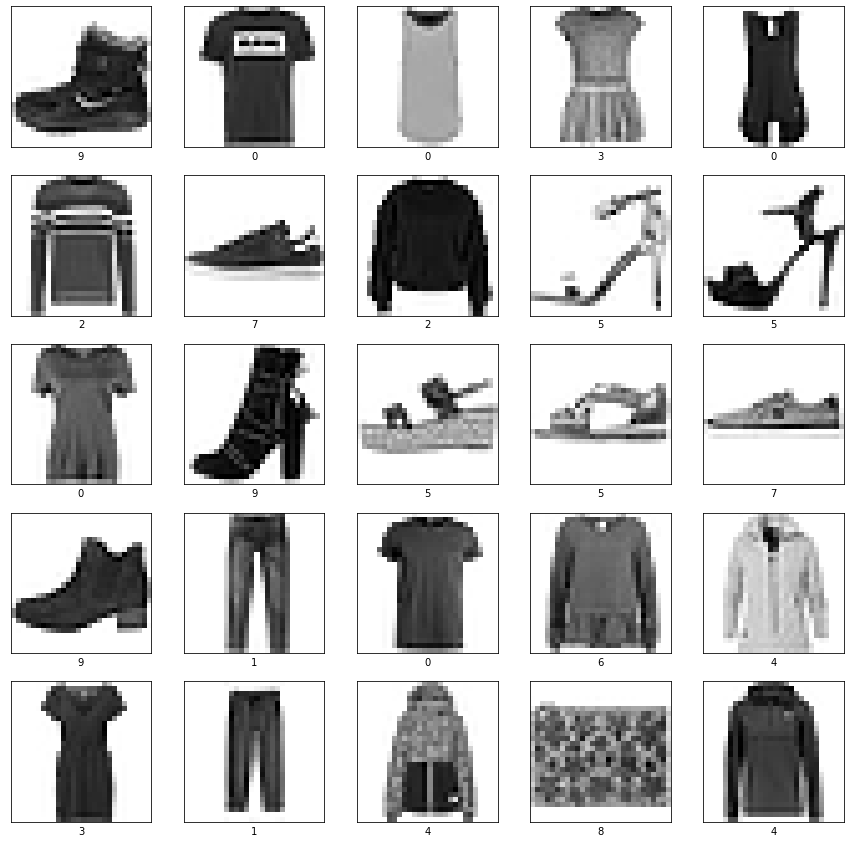

In [8]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_fashion[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labelfashion[i])
plt.show()

# Aplicar las conversiones necesarias para pasar de 3d-array a 2d-array (con “reshape”).

In [9]:
# Para dataset MNIST
train_digits = train_digits.reshape(60000, -1)
test_digits = test_digits.reshape(10000, -1)

In [10]:
# Para dataset FASHION_MNIST
train_fashion = train_fashion.reshape(60000, -1)
test_fashion = test_fashion.reshape(10000, -1)

In [11]:
(train_digits.shape, test_digits.shape), (train_fashion.shape, test_fashion.shape)

(((60000, 784), (10000, 784)), ((60000, 784), (10000, 784)))

Ahora vamos a seleccionar de los 60 mil registros de train, solo 20 mil para entrenar nuestro futuros modelos:

In [12]:
# Seleccionamos los 20000 primeros registros de cada array de train
train_digits = train_digits[:20000]
train_labeldigit = train_labeldigit[:20000]

train_fashion = train_fashion[:20000]
train_labelfashion = train_labelfashion[:20000]

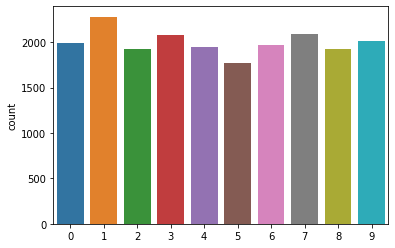

In [13]:
# Plot distribution labeldigit
sns.countplot(train_labeldigit[1:])

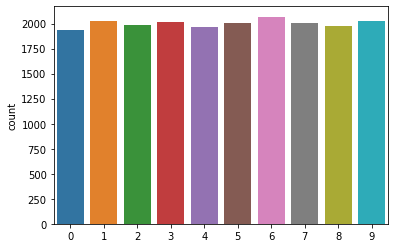

In [14]:
# Plot distribution labelfashion
sns.countplot(train_labelfashion[1:])

In [15]:
# Comprobamos tamaño de nuestros array de train
train_digits.shape, train_labeldigit.shape, train_fashion.shape, train_labelfashion.shape

((20000, 784), (20000,), (20000, 784), (20000,))

Verificamos cuales son los labels de cada uno de los dataset:

In [16]:
digit = np.unique(train_labeldigit)
digit

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
fashion = np.unique(train_labelfashion)
fashion

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

En ambos dataset, nuestra variable objetivo es un numero de 0 a 9.

# Modelos SVM

- DataSet MNIST:

In [19]:
param_grid = {'kernel': ['linear','rbf'],
              'C': [1, 10, 100, 1000],
              'gamma': ['scale'],
              'probability': [False]
             }


timeIni = time()
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=5, verbose=1, scoring="accuracy")
grid.fit(train_digits, train_labeldigit)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", grid.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False}
Tiempo necesario para su cómputo:  14:17:064190


- DataSet Fashion_MNIST

In [ ]:
param_grid = {'kernel': ['linear','rbf'],
              'C': [1, 10, 100, 1000],
              'gamma': ['scale'],
              'probability': [False]
             }


timeIni = time()
grid = GridSearchCV(SVC(), param_grid = param_grid, cv=5, verbose=1, scoring="accuracy")
grid.fit(train_fashion, train_labelfashion)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", grid.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
